In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

import gensim

import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

In [2]:
W2V_SIZE = 300
W2V_WINDOW = 5
W2V_EPOCH = 50
W2V_MIN_COUNT = 1
SEQUENCE_LENGTH = 300

In [3]:
data = pd.read_excel("/content/drive/MyDrive/Roman-Urdu-Toxic-Comments-master/Data/Normalized_Data.xlsx")

In [4]:
data['clean'] = data['clean'].apply(str)
data.sample(3)

,Unnamed: 0,level_0,index,Comment,Toxic,Urdu,clean,length
5915,5915,6032,6032,ye aik faggot hai gaandu,1,یہ ایک فیگوٹ ہے گانڈو,یہ ایک فیگوٹ ہے گانڈو,5
29276,29276,30457,30542,Pakistan ne sire se practices match khela to u...,0,پاکستان نے سائر سے پریکٹس میچ کھیلا تو انہوں ...,پاکستان نے سائر سے پریکٹس میچ کھیلا تو انہوں ن...,18
37181,37181,38563,38651,aap behtareen baat kahi hai,0,آپ بہترین بات کہی ہے,آپ بہترین بات کہی ہے,5


Text(0.5, 1.0, 'Dataset labels distribuition')

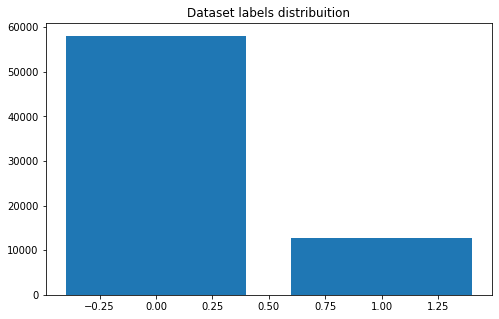

In [5]:
target_cnt = Counter(data.Toxic)
plt.figure(figsize=(8,5))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [6]:
import spacy
nlp = spacy.blank('ur')

In [7]:
documents = [nlp(_text).doc.text.split() for _text in data.clean]
w2v = gensim.models.FastText(size=W2V_SIZE, window=W2V_WINDOW, min_count=W2V_MIN_COUNT, workers=8, sg=1)
w2v.build_vocab(documents)
words = w2v.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 51730


In [9]:
w2v.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

In [10]:
w2v.wv.most_similar("محبت")

[('محبتا', 0.7107784748077393),
 ('کومحبت', 0.6887134313583374),
 ('تھامحبت', 0.6631394624710083),
 ('صحبت', 0.5684131383895874),
 ('محبتیںں', 0.5258364677429199),
 ('چاہت', 0.5153106451034546),
 ('ہےوفا', 0.49630606174468994),
 ('ہوفا', 0.491579532623291),
 ('رغبت', 0.48700374364852905),
 ('محبتیں', 0.4820024371147156)]

In [11]:
w2v.wv.save_word2vec_format('/content/drive/MyDrive/Roman-Urdu-Toxic-Comments-master/emb/embeddings_ft.txt', binary=False)
w2v.wv.save('/content/drive/MyDrive/Roman-Urdu-Toxic-Comments-master/emb/embeddings_ft.bin')

In [12]:
# Tokenization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.clean)
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 51707


In [13]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))

for word, i in tokenizer.word_index.items():
  if word in w2v.wv:
    embedding_matrix[i] = w2v.wv[word]
print(embedding_matrix.shape)

(51707, 300)


In [14]:
np.savez('/content/drive/MyDrive/Roman-Urdu-Toxic-Comments-master/emb/embeddings_matrix.npy', embedding_matrix)

Embeddings without Stop words

In [15]:
import pickle
with open('/content/drive/MyDrive/Roman-Urdu-Toxic-Comments-master/emb/custom_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/My Drive/DL_Project/notebookks/basit/w2v_tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)